## Exploratory Data Analysis

As with any new competition we're going to have to look at the data we're working with. We'll start by loading the annotations and getting a rough sense for what everything looks like.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "data/train/train-annotations-bbox.csv"

In [3]:
train = pd.read_csv(path)

In [10]:
print(train.shape)

(14610229, 14)


In [4]:
train.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
0,000002b66c9c498e,xclick,/m/01g317,1,0.012500,0.195312,0.148438,0.587500,0,1,0,0,0
1,000002b66c9c498e,xclick,/m/01g317,1,0.025000,0.276563,0.714063,0.948438,0,1,0,0,0
2,000002b66c9c498e,xclick,/m/01g317,1,0.151562,0.310937,0.198437,0.590625,1,0,0,0,0
3,000002b66c9c498e,xclick,/m/01g317,1,0.256250,0.429688,0.651563,0.925000,1,0,0,0,0
4,000002b66c9c498e,xclick,/m/01g317,1,0.257812,0.346875,0.235938,0.385938,1,0,0,0,0


The label names are kept in a separate file called `class-descriptions-boxable.csv`. Let's take a look at that now.

In [5]:
class_names_path = "data/train/class-descriptions-boxable.csv"
class_names = pd.read_csv(class_names_path, names=["LabelName", "Class"])
class_names.head()

,LabelName,Class
0,/m/011k07,Tortoise
1,/m/011q46kg,Container
2,/m/012074,Magpie
3,/m/0120dh,Sea turtle
4,/m/01226z,Football


Let's merge the human readable `Class` column into our `train` dataframe.

In [6]:
train = pd.merge(train, class_names, how='left', on=['LabelName'])
train.head(10)

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside,Class
0,000002b66c9c498e,xclick,/m/01g317,1,0.012500,0.195312,0.148438,0.587500,0,1,0,0,0,Person
1,000002b66c9c498e,xclick,/m/01g317,1,0.025000,0.276563,0.714063,0.948438,0,1,0,0,0,Person
2,000002b66c9c498e,xclick,/m/01g317,1,0.151562,0.310937,0.198437,0.590625,1,0,0,0,0,Person
3,000002b66c9c498e,xclick,/m/01g317,1,0.256250,0.429688,0.651563,0.925000,1,0,0,0,0,Person
4,000002b66c9c498e,xclick,/m/01g317,1,0.257812,0.346875,0.235938,0.385938,1,0,0,0,0,Person
5,000002b66c9c498e,xclick,/m/01g317,1,0.320312,0.368750,0.260938,0.328125,1,0,0,0,0,Person
6,000002b66c9c498e,xclick,/m/01g317,1,0.412500,0.945312,0.120312,0.475000,1,0,1,0,0,Person
7,000002b66c9c498e,xclick,/m/0284d,1,0.528125,0.923437,0.675000,0.964063,0,0,0,0,0,Dairy Product
8,000002b66c9c498e,xclick,/m/04bcr3,1,0.064062,0.492188,0.889063,0.993750,0,0,0,0,0,Table
9,000002b66c9c498e,xclick,/m/04bcr3,1,0.301562,0.990625,0.462500,0.595312,0,0,0,0,0,Table


## Label Distribution

There are 600 distinct classes present. Some are overrepresented and some are underrepresented. Let's take a look at the top 100 classes by count and the bottom 100 classes by count.

In [28]:
class_counts = train["Class"].value_counts()

In [31]:
class_counts[:5]

Clothing      1438128
Man           1418594
Tree          1051344
Human face    1037710
Person        1034721
Name: Class, dtype: int64

In [32]:
class_counts[-5:]

Hair spray      10
Maracas         10
Bomb             8
Can opener       7
Paper cutter     4
Name: Class, dtype: int64

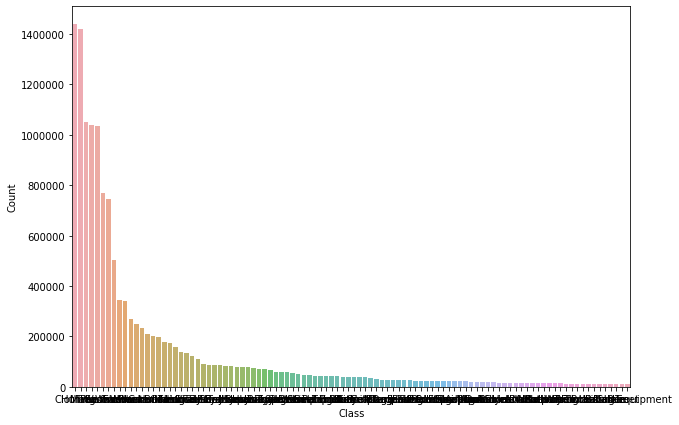

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
sns.barplot(class_counts[:100].index, class_counts[:100].values, alpha=0.8)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

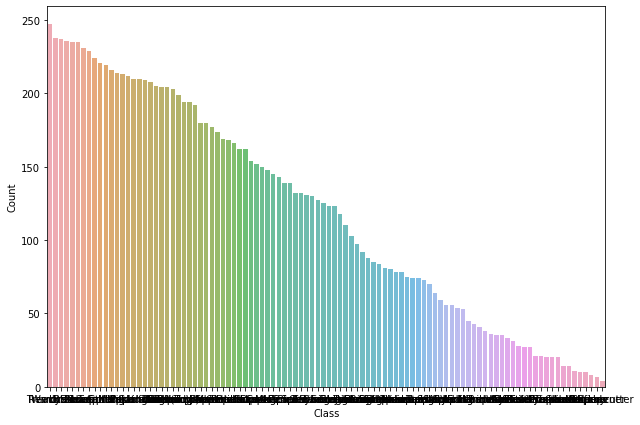

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
sns.barplot(class_counts[-100:].index, class_counts[-100:].values, alpha=0.8)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()